In [44]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [60]:
path = "../Data/Dating.txt"
data = pd.read_csv(path)
# 1、实例化一个转换器类
transfer = MinMaxScaler(feature_range=(0, 1))# 默认 MIN=0, MAX=1
# 2、调用fit_transform
data = transfer.fit_transform(data[['milage','Liters','Consumtime']])# 需要传numpy array格式, 返回array
print("最小值最大值归一化处理的结果：\n", data)

最小值最大值归一化处理的结果：
 [[0.43582641 0.58819286 0.53237967]
 [0.         0.48794044 1.        ]
 [0.19067405 0.         0.43571351]
 [1.         1.         0.19139157]
 [0.3933518  0.01947089 0.        ]]


In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(path)

# 1、实例化一个转换器类
transfer = StandardScaler() # 值都在0附近,所以有负数是正常的
# 2、调用fit_transform
data = transfer.fit_transform(data[['milage','Liters','Consumtime']]) 

print("标准化的结果:\n", data)
print("每一列特征的平均值：\n", transfer.mean_)
print("每一列特征的方差：\n", transfer.var_)

标准化的结果:
 [[ 0.0947602   0.44990013  0.29573441]
 [-1.20166916  0.18312874  1.67200507]
 [-0.63448132 -1.11527928  0.01123265]
 [ 1.77297701  1.54571769 -0.70784025]
 [-0.03158673 -1.06346729 -1.27113187]]
每一列特征的平均值：
 [3.8988000e+04 6.3478996e+00 7.9924800e-01]
每一列特征的方差：
 [4.15683072e+08 1.93505309e+01 2.73652475e-01]


In [91]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

path="../Data/Dating.txt"
data = pd.read_csv(path)

# 1、实例化一个转换器类
transfer = VarianceThreshold(threshold=1)
# 2、调用fit_transform
data = transfer.fit_transform(data.iloc[:, 0:-1])

print("删除低方差特征的结果：\n", data)
print("形状：\n", data.shape)

删除低方差特征的结果：
 [[4.0920000e+04 8.3269760e+00]
 [1.4488000e+04 7.1534690e+00]
 [2.6052000e+04 1.4418710e+00]
 [7.5136000e+04 1.3147394e+01]
 [3.8344000e+04 1.6697880e+00]]
形状：
 (5, 2)


In [94]:
from scipy.stats import pearsonr
import pandas as pd

path="../Data/Dating.txt"
data = pd.read_csv(path)

# 皮尔逊相关系数范围[-1,1], 如果大于0就是正相关(越接近1就越相关), 反之亦然
r = pearsonr(data["milage"], data["Liters"])
print("milage和Liters的相关系数为:\n", r)

r = pearsonr(data["milage"], data["Consumtime"])
print("milage和Liters的相关系数为:\n", r)

milage和Liters的相关系数为:
 (0.660861943290103, 0.2246299034335304)
milage和Liters的相关系数为:
 (-0.6406267138718624, 0.2441916485876286)


In [105]:
from sklearn.decomposition import PCA

data = [[2, 8, 4, 5], [3, 8, 5, 5], [10, 5, 1, 0]]  # 3*4矩阵 包含四个特征

transfer = PCA(n_components=0.95) # N为整数就是转为多少个特征  保留的至少都比原特征值少一个
data_new = transfer.fit_transform(data)
print("(主成分分析)PCA降维:\n", data_new)

(主成分分析)PCA降维:
 [[-3.57495904]
 [-3.17447323]
 [ 6.74943227]]


In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # 所有模型评估都在metrics里面

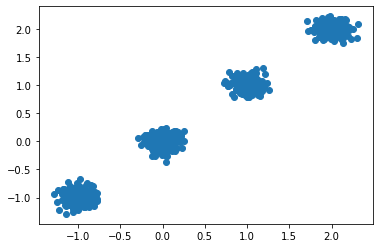

In [194]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.1, 0.1, 0.1, 0.1])
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

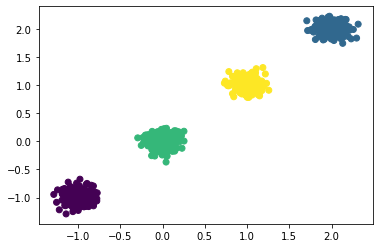

In [195]:
from sklearn.cluster import KMeans

#y_pred = KMeans(n_clusters=4).fit_predict(X)
estimator = KMeans(n_clusters=4, init='k-means++')
estimator.fit(X)
y_pred = estimator.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [196]:
from sklearn.metrics import silhouette_score # 所有模型评估都在metrics里面
score = silhouette_score(X, y_pred)
print("模型轮廓系数为(1 最好, -1 最差):", score)

模型轮廓系数为(1 最好, -1 最差): 0.870480592568606
